# Estudo e mapeamento dos ataques de tubarão no Estado de Pernambuco

#### Objetivo

O projeto tem como objetivo mapear as localizações e o perfil de vítimas de ataques de tubarão dentro do Estado de Pernambuco.

#### Escopo da análise

   A base de dados analisada tem como fonte o site ...., que mostra ocorrências de ataques de tubarão ao redor do mundo no período de ... a ... . 

   O estudo focado no Brasil teve seu objeto de análise escolhido como Estado de Pernanbuco pela grande quantidade de ataques ocorridos em suas praias.
    
Criação de mapa  interativo para fácil visualização das ocorrências.

Itens analisados sobre o perfil da vítima:
    Ano;
    Dia da Semana;
    Atividade;
    Fatalidade;
    Sexo;    

O arquivo utilizado tem formato .xls

### Análise

A base de dados que deu origem a este projeto traz ataques de tubarão ao redor do mundo no período de ... a ... . e suas primeiras 4 linhas podem ser visualizadas abaixo:

In [189]:
df_excel.head(4)

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y_n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
0,2021.07.27.b,27-Jul-2021,2021.0,Unprovoked,USA,Georgia,"Tybee Island, Chatham County",NaN,Yamada Atsushi,M,50s,Lower left legf bitten,N,NaN,NaN,"C. Creswell and J. Marchand, GSAF",2021.07.27.b-Atsushi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf di...,2021.07.27.b,2021.07.27.b,6677.0
1,2021.07.27.a,27-Jul-2021,2021.0,NaN,AUSTRALIA,Western Australia,Varanus Island,Fishing,male,M,30s,Leg bitten,N,20h30,"Sickelfin lemon shark, 3m","J. Marchand, GSAF",2021.07.27.a-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.27.a,2021.07.27.a,6676.0
2,2021.07.26,26-Jul-2021,2021.0,Unprovoked,USA,New York,"Jones Beach, Nassau County",Swimming,male,M,NaN,Minor injury to calf,N,11h00,A small shark,"S. Curatolo-Wagemann, GSAF & K. McMurray, Trac...","2021.07.26-JonesBeach, pdf",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.26,2021.07.26,6675.0
3,2021.07.25,25-Jul-2021,2021.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Squatting in the water,Everton dos Reis Guimarães,M,32,Lacerations to poster thigh and buttock,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.07.25-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.25,2021.07.25,6674.0


O estudo focado no Brasil se iniciou padronizando os dados para decidir qual seria o Estado do país que 
serviria como objeto de análise do projeto. Para isso avaliou-se quantos ataques ocorreram em cada Estado:

In [193]:
df_brazil.area.value_counts()

Pernambuco              77
Rio de Janeiro          11
Maranhão                 5
Bahia                    3
Fernando de Noronha      3
Alagoas                  2
Rio Grande de Norte      2
Porto Seguro             1
Balneário Camboriú       1
Rio Grande Do Sul        1
Santa Catarina State     1
Boi Island, Victoria     1
Paraiba                  1
Name: area, dtype: int64

Como grande parte das ocorrências são concentradas em Pernambuco, tratou-se os dados com a localização de cada
registro e o número de ocorrências em cada uma delas:

In [194]:
df_location.fillna('Unknown').drop_duplicates()

3                    piedade
65          cacimba_do_padre
533      fernando_de_noronha
537               boa_viagem
795         punta_del_chifre
1030      enseada_dos_corais
1247                    pina
1664               itamaracá
1818                 Unknown
2138    pau_amarelo_paulista
2245                candeias
2604                   paiva
2631        barra_de_jangada
Name: location, dtype: object

As localizações padronizadas facilitam o mapeamento dos ataques de forma que pôde-se criar a seguinte visualização interativa:

### Ao clicar nos marcadores pode-se ler o nome do local e o número de ataques ocorridos na região.

In [195]:
for (index, row) in df_coordenates.iterrows():
    folium.Marker(location=[row.loc['latitude'], row.loc['longitude']],
    popup=row.loc['name'],
    tooltip='Click aqui!'
    ).add_to(mapa)
mapa

#### Após mapeamento dos dados volta-se o foco para o perfil da vítima e dos ataques nas seguintes premissas:
##### -Ano;
##### -Dia da Semana;
##### -Atividade;
##### -Fatalidade;
##### -Sexo;    

## Análise - Ataques de tubarão vs Ano:

Em pesquisa realizada vemos diversos especialistas atribuindo a grande quantidade de ataques de tubarão nessa região à
construção do famoso Porto de Suápe em 1983 que causou de a destrução de mangues e comprometeu o ecossistema local. 

### MPPE diz que supressão de mangue em Suape afetou fauna marinha
http://g1.globo.com/pernambuco/noticia/2013/10/mppe-diz-que-supressao-de-mangue-em-suape-afetou-fauna-marinha.html

### Por que ocorrem tantos ataques de tubarão em Recife?
Condições naturais e modernização da região fizeram as feras se aproximarem dos banhistas 

Leia mais em: https://super.abril.com.br/mundo-estranho/por-que-ocorrem-tantos-ataques-de-tubarao-em-recife/
https://super.abril.com.br/mundo-estranho/por-que-ocorrem-tantos-ataques-de-tubarao-em-recife/

### Ataques de tubarão: 25 anos de medo nas praias em Recife
Um quarto de século após início dos ataques de tubarão em Pernambuco, estado tem geração que não toma banho de mar, enquanto cientistas seguem tentando entender o fenômeno

https://www.correiobraziliense.com.br/app/noticia/brasil/2018/06/04/interna-brasil,686033/ataques-de-tubarao-25-anos-de-medo-nas-praias-em-recife.shtml








### Com análise da base de dados pode-se observar uma elevada ocorrência de registros após a data de construção do Porto.

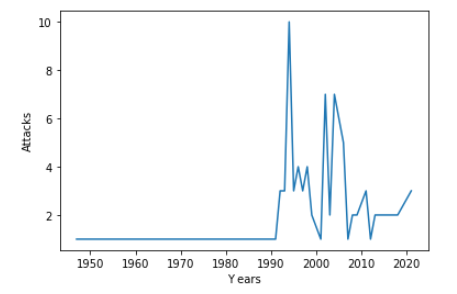

Após análise dos ataques por ano, pôde-se extrair o dia da semana em que cada ataque aconteceu:

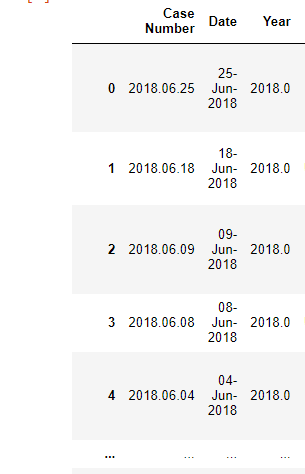

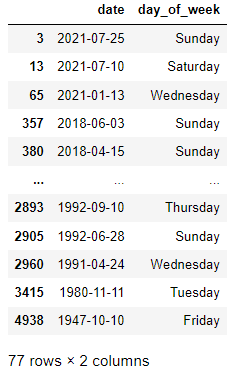

### Com isso temos o gráfico de Ataques de Tubarão vs Dia da Semana:

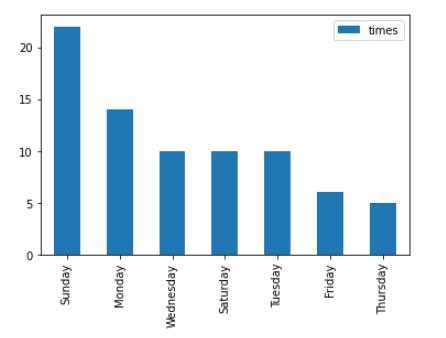

## Análise vítimas:

   Com o tratamento e análise dos dados obtêm-se 67 mortes masculinas, 3 femininas e 7 casos de informações faltantes:

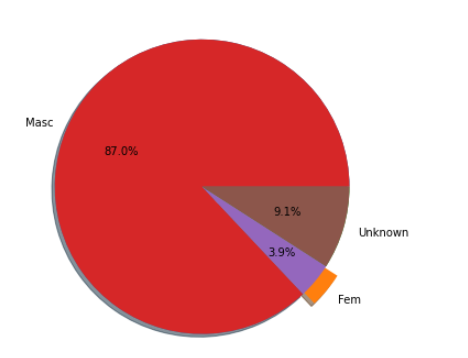

A grande maioria das 77 vítimas estava surfando quando o ataque ocorreu, 31 ocorrências.
Logo após a atividade mais comum é nadando com 25 ocorrências.
Others com 21, contabiliza atividades como Pescar, Banhar-se ou Mergulho.

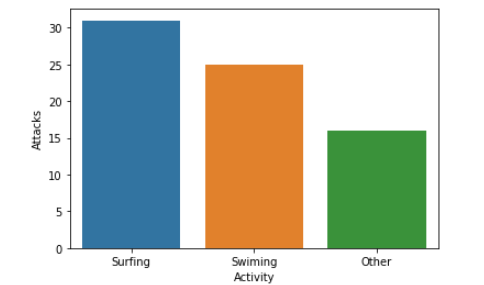

### Cresce número de mulheres surfistas no Brasil

https://esportes.estadao.com.br/noticias/geral,cresce-numero-de-mulheres-surfistas-no-brasil,1646102

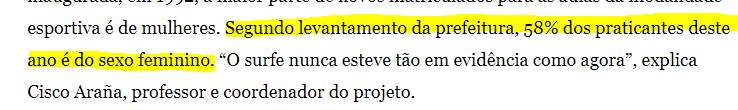

Dos 77 ataques de tubarão ocorridos em Pernambuco, 55,8% dos ataques não foi fatal.

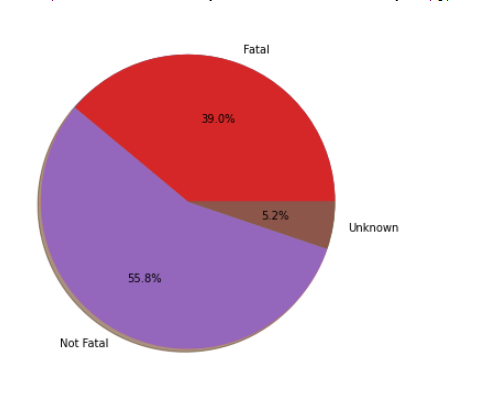

#### Próximos passos, sobre o que nao deu certo ou o que pode melhorar

Otimizar código em funções específicas.

Rever algumas fórmulas.

Familiarizar-se com os diferentes types de códigos.

Melhorar a edição do texto do mapa interativo e dos gráficos.

Evitar perder dados.

Trabalhar com a maior quantidade de dados reais possíveis.

In [1]:
#titulo da analise

#objetivo**

#<Escopo da analise, tipo de dados analisados (pernambuco, etc)

#conclusão***

#Próximos passos, sobre o que nao deu certo ou o que
#poderia melhorar no modelo da analise, sobre as informações***

#Contexto

#Análise

#Resultados***

#Metodologia

#Sugestão de fazer tudo isso no ReadMe. Resumão. 
#Slides explicando os pontos.
#NÃO precisa ser tão complexo. 

## Importar Bibliotecas
#### (Biblioteca "folium" para o mapa interativo, "seaborn" e "matplot" para os gráficos)

In [2]:
import pandas as pd

import numpy as np

from datetime import datetime

import re

!pip install folium
import folium
from folium import plugins

import matplotlib.pyplot as plt 
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [3]:
ls

 O volume na unidade C é OS
 O Número de Série do Volume é D822-8AF4

 Pasta de C:\Users\erick\IronHack\new_folder\Shark Attack

26/08/2021  22:47    <DIR>          .
26/08/2021  22:47    <DIR>          ..
21/08/2021  16:42    <DIR>          .ipynb_checkpoints
17/08/2021  01:52    <DIR>          archive
16/08/2021  23:29         3.131.085 attacks.csv
21/08/2021  20:07            11.179 coordenates.xlsx
21/08/2021  20:03            11.134 coordenates2.xlsx
21/08/2021  20:04            11.131 coordenates3.xlsx
21/08/2021  22:44            11.624 coordenates4.xlsx
22/08/2021  18:49         8.718.336 GSAF5.xls
26/08/2021  22:47            75.235 Shark Attack.ipynb
               7 arquivo(s)     11.969.724 bytes
               4 pasta(s)   219.203.239.936 bytes disponíveis


## Importar Arquivo .csv

In [4]:
df_csv = pd.read_csv('attacks.csv')

In [5]:
df_csv

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### O arquivo .csv possui data base defasada até 2018.

## Importar Arquivo .xls

In [6]:
df_excel = pd.read_excel('GSAF5.xls')

In [7]:
df_excel

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2021.07.27.b,27-Jul-2021,2021.0,Unprovoked,USA,Georgia,"Tybee Island, Chatham County",NaN,Yamada Atsushi,M,50s,Lower left legf bitten,N,NaN,NaN,"C. Creswell and J. Marchand, GSAF",2021.07.27.b-Atsushi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf di...,2021.07.27.b,2021.07.27.b,6677.0,NaN,NaN
1,2021.07.27.a,27-Jul-2021,2021.0,NaN,AUSTRALIA,Western Australia,Varanus Island,Fishing,male,M,30s,Leg bitten,N,20h30,"Sickelfin lemon shark, 3m","J. Marchand, GSAF",2021.07.27.a-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.27.a,2021.07.27.a,6676.0,NaN,NaN
2,2021.07.26,26-Jul-2021,2021.0,Unprovoked,USA,New York,"Jones Beach, Nassau County",Swimming,male,M,NaN,Minor injury to calf,N,11h00,A small shark,"S. Curatolo-Wagemann, GSAF & K. McMurray, Trac...","2021.07.26-JonesBeach, pdf",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.26,2021.07.26,6675.0,NaN,NaN
3,2021.07.25,25-Jul-2021,2021.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Squatting in the water,Everton dos Reis Guimarães,M,32,Lacerations to poster thigh and buttock,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.07.25-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.25,2021.07.25,6674.0,NaN,NaN
4,2021.07.23,23-Jul-2021,2021.0,Provoked,THAILAND,Chanthaburi Province,Kung Krabaenbay Royal Département Study Center,Moving captive shark,Boonterm Singhasura,M,55,Lacerations to lower right leg PROVOKED INCIDENT,N,NaN,"Bull shark, +100kg","J. Marchand, GSAF",2021.07.23-Singhasura.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.23,2021.07.23,6673.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Quantidade e nome de colunas igual a da base .csv (mesma base, porém com dados até Julho/21).

### Análise dos colunas e "Dtypes"

In [8]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25817 entries, 0 to 25816
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8795 non-null   object 
 1   Date                    6675 non-null   object 
 2   Year                    6674 non-null   float64
 3   Type                    6662 non-null   object 
 4   Country                 6626 non-null   object 
 5   Area                    6205 non-null   object 
 6   Location                6123 non-null   object 
 7   Activity                6111 non-null   object 
 8   Name                    6461 non-null   object 
 9   Sex                     6102 non-null   object 
 10  Age                     3751 non-null   object 
 11  Injury                  6644 non-null   object 
 12  Fatal (Y/N)             6124 non-null   object 
 13  Time                    3228 non-null   object 
 14  Species                 3673 non-null 

In [9]:
df_excel.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

#### Padronização dos nomes das colunas

In [10]:
df_excel.columns= [column.lower().replace(" ", '_').replace('/', '_') for column in df_excel.columns]

In [11]:
df_excel.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y_n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

#### Exclusão de colunas desnecessárias

In [12]:
df_excel = df_excel.drop('unnamed:_22', axis=1)

In [13]:
df_excel = df_excel.drop('unnamed:_23', axis=1)

### Tratamento coluna "country"

#### Análise Geral

In [14]:
df_excel.country.map(type)

0          <class 'str'>
1          <class 'str'>
2          <class 'str'>
3          <class 'str'>
4          <class 'str'>
              ...       
25812    <class 'float'>
25813    <class 'float'>
25814    <class 'float'>
25815    <class 'float'>
25816    <class 'float'>
Name: country, Length: 25817, dtype: object

In [15]:
type(df_excel)

pandas.core.frame.DataFrame

In [16]:
df_country = df_excel.country

In [17]:
df_country

0              USA
1        AUSTRALIA
2              USA
3           BRAZIL
4         THAILAND
           ...    
25812          NaN
25813          NaN
25814          NaN
25815          NaN
25816          NaN
Name: country, Length: 25817, dtype: object

In [18]:
type(df_country)

pandas.core.series.Series

#### Visão dos 25 primeiros países com mais registros

In [19]:
df_country.value_counts().head(25)

USA                 2413
AUSTRALIA           1426
SOUTH AFRICA         589
NEW ZEALAND          139
PAPUA NEW GUINEA     135
BAHAMAS              126
BRAZIL               117
MEXICO                95
ITALY                 72
FIJI                  65
NEW CALEDONIA         62
PHILIPPINES           61
REUNION               60
MOZAMBIQUE            46
CUBA                  46
SPAIN                 45
EGYPT                 43
INDIA                 40
CROATIA               35
JAPAN                 35
FRENCH POLYNESIA      33
PANAMA                32
SOLOMON ISLANDS       30
JAMAICA               29
IRAN                  29
Name: country, dtype: int64

#### Visão dos 25 últimos países com mais registros

In [20]:
df_country.value_counts().tail(25)

GULF OF ADEN                    1
 PHILIPPINES                    1
BRITISH WEST INDIES             1
ARUBA                           1
NORTHERN MARIANA ISLANDS        1
KUWAIT                          1
NICARAGUA                       1
ANDAMAN ISLANDS                 1
NORTH SEA                       1
Between PORTUGAL & INDIA        1
KOREA                           1
ROATAN                          1
ARGENTINA                       1
RED SEA                         1
GREENLAND                       1
CURACAO                         1
NORTH ATLANTIC OCEAN            1
ADMIRALTY ISLANDS               1
EQUATORIAL GUINEA / CAMEROON    1
GABON                           1
TASMAN SEA                      1
ST. MAARTIN                     1
COOK ISLANDS                    1
BAY OF BENGAL                   1
MID-PACIFC OCEAN                1
Name: country, dtype: int64

#### Tratamento da coluna

In [21]:
df_country.size

25817

In [22]:
df_country.sort_values(ascending=True)

5005           PHILIPPINES
2393                 TONGA
2036                 TONGA
2037                 TONGA
4152     ADMIRALTY ISLANDS
               ...        
25812                  NaN
25813                  NaN
25814                  NaN
25815                  NaN
25816                  NaN
Name: country, Length: 25817, dtype: object

#### Conferência de valores nulos

In [23]:
df_country.isnull().value_counts()

True     19191
False     6626
Name: country, dtype: int64

In [24]:
df_country = df_excel['country'].str.strip()

In [25]:
type(df_country)

pandas.core.series.Series

#### Visão sem nomes duplicados

In [26]:
df_country.sort_values(ascending=True).drop_duplicates().head(50)

4152             ADMIRALTY ISLANDS
6420                        AFRICA
6429                       ALGERIA
4497                AMERICAN SAMOA
4506    ANDAMAN / NICOBAR ISLANDAS
6330               ANDAMAN ISLANDS
2871                        ANGOLA
6493                       ANTIGUA
4718                     ARGENTINA
682                          ARUBA
6665                         ASIA?
6045                ATLANTIC OCEAN
4870                     AUSTRALIA
4431                        AZORES
6590                       BAHAMAS
6589                       BAHREIN
3600                    BANGLADESH
5998                      BARBADOS
5078                 BAY OF BENGAL
6650                        BELIZE
4356                       BERMUDA
2775                        BRAZIL
3726                 BRITISH ISLES
6066            BRITISH NEW GUINEA
1658        BRITISH VIRGIN ISLANDS
4156           BRITISH WEST INDIES
6031                         BURMA
6541      Between PORTUGAL & INDIA
4743                

### Decide-se focar apenas nos registros "BRAZIL"

In [27]:
df_brazil = df_excel[df_excel.country=='BRAZIL']

#### Visão geral

In [28]:
df_brazil

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y_n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
3,2021.07.25,25-Jul-2021,2021.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Squatting in the water,Everton dos Reis Guimarães,M,32,Lacerations to poster thigh and buttock,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.07.25-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.25,2021.07.25,6674.0
13,2021.07.10,10-Jul-2021,2021.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Wading,Marcelo Rocha Santos,M,51,FATAL,Y,13h50,NaN,"K. McMurray, TrackingSharks.com",2021.07.10-Santos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.10,2021.07.10,6664.0
65,NaN,13-Jan-2021,2021.0,Unprovoked,BRAZIL,Pernambuco,Cacimba do Padre Beach,Surfing,Sergo Noronha,M,52,Puncture wounds to right hand,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.01.13.b-Noronha.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.01.13.b,2021.01.13.b,6612.0
256,2019.05.04,04-May-2019,2019.0,Provoked,BRAZIL,Fernando de Noronha,Praia de Porto,Fishing,male,M,12,Cut to toe from hooked shark PROVOKED INCIDENT,N,NaN,Lemon shark pup,"K. McMurray, TrackingSharks.com",2019.05.04-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.05.04,2019.05.04,6421.0
274,2019.02.14,14-Feb-2019,2019.0,Unprovoked,BRAZIL,Fernando de Noronha,Cacimba do Padre,Surfing,Carlos Vinícius de Oliveira,M,31,Minor injury to face,N,17h30,Lemon shark,"K. McMurray, TrackingSharks.com",2019.02.14-Oliveira.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.02.14,2019.02.14,6403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,1927.10.25,25-Oct-1927,1927.0,Sea Disaster,BRAZIL,Porto Seguro,90 miles off Albrohos Island,Italian liner Principessa Mafalda sank,NaN,NaN,NaN,"Of 1256 on board, 295 perished, some were take...",Y,12h00,NaN,"L. Schultz & M. Malin, p.557; SAF Case #833",1927.10.25-Mafalda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1927.10.25,1927.10.25,1186.0
6116,1887.01.20,20-Jan-1887,1887.0,Sea Disaster,BRAZIL,Alagoas,Maceió,The passenger ship Kapuna was run down the ore...,Whittle,M,NaN,FATAL,Y,03h00,NaN,"Brisbane Courier, 4/14/1887",1887.01.20-Whittle.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1887.01.20,1887.01.20,561.0
6148,1884.04.38.R,Reported 28-Apr-1884,1884.0,Unprovoked,BRAZIL,NaN,Bahia,Fell overboard from the steamship Chala,male,M,NaN,FATAL,Y,NaN,NaN,"Pittsburgh Post Gazette, 4/28/1884",1884.04.28.R-ChalaCook.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1884.04.28.R,1884.04.38.R,529.0
6219,1878.02.02,02-Feb-1878,1878.0,Sea Disaster,BRAZIL,NaN,NaN,Washed off raft,escaped convict,M,NaN,FATAL,Y,NaN,NaN,"St Louis Post Dispatch, 5/22/1878",1878.02.02-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.02.02,1878.02.02,458.0


### Com a visão abaixo, decide-se focar apenas em Pernambuco

In [29]:
df_brazil.area.value_counts()

Pernambuco              77
Rio de Janeiro          11
Maranhão                 5
Bahia                    3
Fernando de Noronha      3
Alagoas                  2
Rio Grande de Norte      2
Porto Seguro             1
Balneário Camboriú       1
Rio Grande Do Sul        1
Santa Catarina State     1
Boi Island, Victoria     1
Paraiba                  1
Name: area, dtype: int64

### Análise focada em "Pernambuco"

In [30]:
df_pernambuco = df_excel[df_excel.area=='Pernambuco']

#### Visão geral

In [31]:
df_pernambuco

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y_n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
3,2021.07.25,25-Jul-2021,2021.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Squatting in the water,Everton dos Reis Guimarães,M,32,Lacerations to poster thigh and buttock,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.07.25-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.25,2021.07.25,6674.0
13,2021.07.10,10-Jul-2021,2021.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Wading,Marcelo Rocha Santos,M,51,FATAL,Y,13h50,NaN,"K. McMurray, TrackingSharks.com",2021.07.10-Santos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.10,2021.07.10,6664.0
65,NaN,13-Jan-2021,2021.0,Unprovoked,BRAZIL,Pernambuco,Cacimba do Padre Beach,Surfing,Sergo Noronha,M,52,Puncture wounds to right hand,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.01.13.b-Noronha.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.01.13.b,2021.01.13.b,6612.0
357,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6320.0
380,2018.04.15.c,15-Apr-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1992.09.10,10-Sep-1992,1992.0,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem, Recife",Swimming,Enoque Pereira dos Santos,M,NaN,FATAL,Y,NaN,NaN,D. Duarte,1992.09.10-BoaViagem.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.09.10,1992.09.10,3784.0
2905,1992.06.28.b,28-Jun-1992,1992.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Ubiratan Martins Gomes,M,NaN,FATAL,Y,NaN,NaN,D .Duarte,1992.06.28.b-Piedade-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.06.28.b,1992.06.28.b,3772.0
2960,1991.04.24,24-Apr-1991,1991.0,Provoked,BRAZIL,Pernambuco,"Praia de Pau Amarelo, Recife",Fishing,L.F.,NaN,NaN,2 fingers severed by netted shark PROVOKED INC...,N,Afternoon,"170-kg, 2.8 m shark",M. Szpilman,1991.04.24-PauAmarelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.04.24,1991.04.24,3717.0
3415,1980.11.11.,11-Nov-1980,1980.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Ibson Gomes Vieira,M,16,FATAL,Y,NaN,NaN,"JC Online, 6/25/2012",1980.11.11-Vieira.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1980.11.11.,1980.11.11.,3262.0


In [32]:
len(df_pernambuco)

77

#### Visão de todas as colunas

In [33]:
df_pernambuco.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_(y_n)', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order'],
      dtype='object')

#### Análise dos valores "nulos" 

In [34]:
df_pernambuco.area.isnull().value_counts(normalize=True)

False    1.0
Name: area, dtype: float64

In [35]:
df_brazil.country.isnull().value_counts(normalize=True)

False    1.0
Name: country, dtype: float64

In [36]:
df_brazil.isnull().sum()

case_number                1
date                       0
year                       0
type                       0
country                    0
area                       8
location                   5
activity                   9
name                       5
sex_                      14
age                       48
injury                     2
fatal_(y_n)                8
time                      72
species_                  77
investigator_or_source     0
pdf                        0
href_formula               0
href                       0
case_number.1              0
case_number.2              0
original_order             0
dtype: int64

### Análise da coluna "year" 
##### A análise permanece com o filtro da coluna "location" em "Pernambuco"

In [37]:
type(df_pernambuco.year)

pandas.core.series.Series

In [38]:
df_pernambuco.year

3       2021.0
13      2021.0
65      2021.0
357     2018.0
380     2018.0
         ...  
2893    1992.0
2905    1992.0
2960    1991.0
3415    1980.0
4938    1947.0
Name: year, Length: 77, dtype: float64

#### Remoção ".0"

In [39]:
df_pernambuco.year.astype('int64')

3       2021
13      2021
65      2021
357     2018
380     2018
        ... 
2893    1992
2905    1992
2960    1991
3415    1980
4938    1947
Name: year, Length: 77, dtype: int64

#### Estabelendo mudanças no DataFrame

In [40]:
df_pernambuco.year.astype('int64')

3       2021
13      2021
65      2021
357     2018
380     2018
        ... 
2893    1992
2905    1992
2960    1991
3415    1980
4938    1947
Name: year, Length: 77, dtype: int64

In [41]:
df_pernambuco['year'] = df_pernambuco['year'].astype(np.int64)

In [42]:
df_pernambuco['year']

3       2021
13      2021
65      2021
357     2018
380     2018
        ... 
2893    1992
2905    1992
2960    1991
3415    1980
4938    1947
Name: year, Length: 77, dtype: int64

#### Conferência das mudanças na coluna "year"

In [43]:
df_pernambuco

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y_n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
3,2021.07.25,25-Jul-2021,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Squatting in the water,Everton dos Reis Guimarães,M,32,Lacerations to poster thigh and buttock,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.07.25-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.25,2021.07.25,6674.0
13,2021.07.10,10-Jul-2021,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Wading,Marcelo Rocha Santos,M,51,FATAL,Y,13h50,NaN,"K. McMurray, TrackingSharks.com",2021.07.10-Santos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.10,2021.07.10,6664.0
65,NaN,13-Jan-2021,2021,Unprovoked,BRAZIL,Pernambuco,Cacimba do Padre Beach,Surfing,Sergo Noronha,M,52,Puncture wounds to right hand,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.01.13.b-Noronha.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.01.13.b,2021.01.13.b,6612.0
357,2018.06.03.a,03-Jun-2018,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6320.0
380,2018.04.15.c,15-Apr-2018,2018,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1992.09.10,10-Sep-1992,1992,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem, Recife",Swimming,Enoque Pereira dos Santos,M,NaN,FATAL,Y,NaN,NaN,D. Duarte,1992.09.10-BoaViagem.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.09.10,1992.09.10,3784.0
2905,1992.06.28.b,28-Jun-1992,1992,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Ubiratan Martins Gomes,M,NaN,FATAL,Y,NaN,NaN,D .Duarte,1992.06.28.b-Piedade-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.06.28.b,1992.06.28.b,3772.0
2960,1991.04.24,24-Apr-1991,1991,Provoked,BRAZIL,Pernambuco,"Praia de Pau Amarelo, Recife",Fishing,L.F.,NaN,NaN,2 fingers severed by netted shark PROVOKED INC...,N,Afternoon,"170-kg, 2.8 m shark",M. Szpilman,1991.04.24-PauAmarelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.04.24,1991.04.24,3717.0
3415,1980.11.11.,11-Nov-1980,1980,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Ibson Gomes Vieira,M,16,FATAL,Y,NaN,NaN,"JC Online, 6/25/2012",1980.11.11-Vieira.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1980.11.11.,1980.11.11.,3262.0


### Análise coluna "date"
##### A análise permanece com o filtro da coluna "location" em "Pernambuco"

#### Análise de "nulos"

In [44]:
df_brazil.date.isnull().value_counts(normalize=True)

False    1.0
Name: date, dtype: float64

#### Substituição nas datas  de letras por números 

In [45]:
df_brazil.case_number

3         2021.07.25
13        2021.07.10
65               NaN
256       2019.05.04
274       2019.02.14
            ...     
5491      1927.10.25
6116      1887.01.20
6148    1884.04.38.R
6219      1878.02.02
6472      1826.12.00
Name: case_number, Length: 117, dtype: object

#### Visão geral

In [46]:
df_pernambuco.date

3       25-Jul-2021
13      10-Jul-2021
65      13-Jan-2021
357     03-Jun-2018
380     15-Apr-2018
           ...     
2893    10-Sep-1992
2905    28-Jun-1992
2960    24-Apr-1991
3415    11-Nov-1980
4938    10-Oct-1947
Name: date, Length: 77, dtype: object

#### Atribuição de mudanças em df_pernambuco

In [47]:
df_pernambuco['date'] = pd.to_datetime(df_pernambuco.date)

In [48]:
df_pernambuco

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y_n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order
3,2021.07.25,2021-07-25,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Squatting in the water,Everton dos Reis Guimarães,M,32,Lacerations to poster thigh and buttock,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.07.25-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.25,2021.07.25,6674.0
13,2021.07.10,2021-07-10,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Wading,Marcelo Rocha Santos,M,51,FATAL,Y,13h50,NaN,"K. McMurray, TrackingSharks.com",2021.07.10-Santos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.10,2021.07.10,6664.0
65,NaN,2021-01-13,2021,Unprovoked,BRAZIL,Pernambuco,Cacimba do Padre Beach,Surfing,Sergo Noronha,M,52,Puncture wounds to right hand,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.01.13.b-Noronha.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.01.13.b,2021.01.13.b,6612.0
357,2018.06.03.a,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6320.0
380,2018.04.15.c,2018-04-15,2018,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1992.09.10,1992-09-10,1992,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem, Recife",Swimming,Enoque Pereira dos Santos,M,NaN,FATAL,Y,NaN,NaN,D. Duarte,1992.09.10-BoaViagem.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.09.10,1992.09.10,3784.0
2905,1992.06.28.b,1992-06-28,1992,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Ubiratan Martins Gomes,M,NaN,FATAL,Y,NaN,NaN,D .Duarte,1992.06.28.b-Piedade-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.06.28.b,1992.06.28.b,3772.0
2960,1991.04.24,1991-04-24,1991,Provoked,BRAZIL,Pernambuco,"Praia de Pau Amarelo, Recife",Fishing,L.F.,NaN,NaN,2 fingers severed by netted shark PROVOKED INC...,N,Afternoon,"170-kg, 2.8 m shark",M. Szpilman,1991.04.24-PauAmarelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.04.24,1991.04.24,3717.0
3415,1980.11.11.,1980-11-11,1980,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Ibson Gomes Vieira,M,16,FATAL,Y,NaN,NaN,"JC Online, 6/25/2012",1980.11.11-Vieira.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1980.11.11.,1980.11.11.,3262.0


### Inclusão da coluna "day_of_week"
##### A coluna contém o dia da semana em que ocorreu o ataque de tubarão

In [49]:
df_pernambuco['day_of_week'] = df_pernambuco['date'].dt.day_name()

In [50]:
df_pernambuco

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y_n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,day_of_week
3,2021.07.25,2021-07-25,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Squatting in the water,Everton dos Reis Guimarães,M,32,Lacerations to poster thigh and buttock,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.07.25-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.25,2021.07.25,6674.0,Sunday
13,2021.07.10,2021-07-10,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Wading,Marcelo Rocha Santos,M,51,FATAL,Y,13h50,NaN,"K. McMurray, TrackingSharks.com",2021.07.10-Santos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.10,2021.07.10,6664.0,Saturday
65,NaN,2021-01-13,2021,Unprovoked,BRAZIL,Pernambuco,Cacimba do Padre Beach,Surfing,Sergo Noronha,M,52,Puncture wounds to right hand,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.01.13.b-Noronha.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.01.13.b,2021.01.13.b,6612.0,Wednesday
357,2018.06.03.a,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6320.0,Sunday
380,2018.04.15.c,2018-04-15,2018,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6297.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1992.09.10,1992-09-10,1992,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem, Recife",Swimming,Enoque Pereira dos Santos,M,NaN,FATAL,Y,NaN,NaN,D. Duarte,1992.09.10-BoaViagem.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.09.10,1992.09.10,3784.0,Thursday
2905,1992.06.28.b,1992-06-28,1992,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Ubiratan Martins Gomes,M,NaN,FATAL,Y,NaN,NaN,D .Duarte,1992.06.28.b-Piedade-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.06.28.b,1992.06.28.b,3772.0,Sunday
2960,1991.04.24,1991-04-24,1991,Provoked,BRAZIL,Pernambuco,"Praia de Pau Amarelo, Recife",Fishing,L.F.,NaN,NaN,2 fingers severed by netted shark PROVOKED INC...,N,Afternoon,"170-kg, 2.8 m shark",M. Szpilman,1991.04.24-PauAmarelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.04.24,1991.04.24,3717.0,Wednesday
3415,1980.11.11.,1980-11-11,1980,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Ibson Gomes Vieira,M,16,FATAL,Y,NaN,NaN,"JC Online, 6/25/2012",1980.11.11-Vieira.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1980.11.11.,1980.11.11.,3262.0,Tuesday


### Conferência da coluna "day_of_week" em comparação com a coluna "date"

In [51]:
df_pernambuco[['date', 'day_of_week']]

,date,day_of_week
3,2021-07-25,Sunday
13,2021-07-10,Saturday
65,2021-01-13,Wednesday
357,2018-06-03,Sunday
380,2018-04-15,Sunday
...,...,...
2893,1992-09-10,Thursday
2905,1992-06-28,Sunday
2960,1991-04-24,Wednesday
3415,1980-11-11,Tuesday


### Análise para padronização da coluna "location"

In [52]:
df_pernambuco.location.value_counts()

Boa Viagem, Recife                                          14
Piedade                                                     13
Boa Viagem Beach, Recife                                     9
Paiva                                                        4
Piedade Beach, Recife                                        4
Piedade, Recife                                              4
Candeias                                                     2
Piedade Beach                                                2
Barra de Jangada                                             2
Praia do Pina                                                2
Punta Del Chifre Beach, Olinda                               2
Pina, Recife                                                 2
Pina                                                         1
Piedade Beach, Jaboatão dos Guararapes City                  1
Pau Amarelo Beach, Paulista District (17 km from Recife)     1
Piedade                                                

#### Conferência de valor nulo

In [53]:
df_pernambuco.location.isnull().value_counts()

False    76
True      1
Name: location, dtype: int64

In [54]:
df_pernambuco.location.head(30)

3                                   Piedade
13                                  Piedade
65                   Cacimba do Padre Beach
357                   Piedade Beach, Recife
380                                 Piedade
533         Fernando de Noronha Marine Park
537                      Boa Viagem, Recife
681                      Fernano de Noronha
795                Praia del Chifre, Olinda
1008               Boa Viagem Beach, Recife
1030                       Coral Cove Beach
1108    Coral Cove, Cabo de Santo Agostinho
1202         Punta Del Chifre Beach, Olinda
1247                          Praia do Pina
1260                          Praia do Pina
1447                        Piedade, Recife
1449                        Piedade, Recife
1606               Punta Del Chifre, Olinda
1610                        Piedade, Recife
1664                              Itamaracá
1799                                   Pina
1818               Body recovered at Goiana
1829         Punta Del Chifre Be

### Padronização de termos para coluna "location"
##### (Esta estapa possui otimização do código a ser feita)

In [55]:
df_location = df_pernambuco['location'].str.lower().replace('Beach', '')

In [56]:
df_location = df_location.str.replace('olinda', '')

In [57]:
df_location = df_location.str.replace('city', '')

In [58]:
df_location = df_location.str.replace('recife', '')

In [59]:
df_location = df_location.str.replace('praia', '')

In [60]:
df_location = df_location.str.replace('beach', '')

In [61]:
df_location = df_location.str.replace(',', '')

In [62]:
df_location = df_location.str.replace(' ', '_')

In [63]:
df_location = df_location.str.replace('__','_')

In [64]:
df_location = df_location.str.replace('_de_pau_amarelo_','pau_amarelo_paulista')

In [65]:
df_location = df_location.str.replace('(','')

In [66]:
df_location = df_location.str.replace(')','')

In [67]:
df_location = df_location.str.replace('_district_17_km_from_','')

In [68]:
df_location = df_location.str.replace('piedade_','piedade')

In [69]:
df_location = df_location.str.replace('fernando_de_noronha_marine_park','fernando_de_noronha')

In [70]:
df_location = df_location.str.replace('fernano_de_noronha','fernando_de_noronha')

In [71]:
df_location = df_location.str.replace('_boa_viagem_','boa_viagem')

In [72]:
df_location = df_location.str.replace('_boa_viagem','boa_viagem')

In [73]:
df_location = df_location.str.replace('boa_viagem_','boa_viagem')

In [74]:
df_location = df_location.str.replace('_del_chifre_','punta_del_chifre')

In [75]:
df_location = df_location.str.replace('del_chifre_','punta_del_chifre')

In [76]:
df_location = df_location.str.replace('puntadel_chifre_','punta_del_chifre')

In [77]:
df_location = df_location.str.replace('_do_pina','pina')

In [78]:
df_location = df_location.str.replace('pina_','pina')

In [79]:
df_location = df_location.str.replace('coral_cove_','coral_cove')

In [80]:
df_location = df_location.str.replace('coral_cove','enseada_dos_corais')

In [81]:
df_location = df_location.str.replace('cacimba_do_padre_','cacimba_do_padre')

In [82]:
df_location = df_location.str.replace('body_recovered_at_goiana', 'Unknown')

In [83]:
df_location = df_location.str.replace('enseada_dos_coraiscabo_de_santo_agostinho','enseada_dos_corais')

In [84]:
df_location = df_location.str.replace('puntapunta_del_chifre','punta_del_chifre')

In [85]:
df_location = df_location.str.replace('piedadejaboatão_dos_guararapes_','piedade')

#### Visão sem nomes duplicados

In [86]:
df_location.sort_values(ascending=True).drop_duplicates()

1818                 Unknown
2631        barra_de_jangada
2581              boa_viagem
65          cacimba_do_padre
2729                candeias
1030      enseada_dos_corais
533      fernando_de_noronha
1664               itamaracá
2770                   paiva
2138    pau_amarelo_paulista
3                    piedade
1998                    pina
1202        punta_del_chifre
2637                     NaN
Name: location, dtype: object

#### Preenchimento de valor nulo com nome "Unknown"

In [87]:
df_location.fillna('Unknown').drop_duplicates()

3                    piedade
65          cacimba_do_padre
533      fernando_de_noronha
537               boa_viagem
795         punta_del_chifre
1030      enseada_dos_corais
1247                    pina
1664               itamaracá
1818                 Unknown
2138    pau_amarelo_paulista
2245                candeias
2604                   paiva
2631        barra_de_jangada
Name: location, dtype: object

In [88]:
df_location.fillna('Unknown', inplace=True)

#### Continua-se com a mesma quantidade de itens do início. Não houve perda de dados.

In [89]:
df_location

3                    piedade
13                   piedade
65          cacimba_do_padre
357                  piedade
380                  piedade
                ...         
2893              boa_viagem
2905                 piedade
2960    pau_amarelo_paulista
3415                 piedade
4938                 piedade
Name: location, Length: 77, dtype: object

In [90]:
df_pernambuco = df_pernambuco.assign(loc_check=df_location)

In [91]:
df_pernambuco

,case_number,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_(y_n),time,species_,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,day_of_week,loc_check
3,2021.07.25,2021-07-25,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Squatting in the water,Everton dos Reis Guimarães,M,32,Lacerations to poster thigh and buttock,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.07.25-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.25,2021.07.25,6674.0,Sunday,piedade
13,2021.07.10,2021-07-10,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Wading,Marcelo Rocha Santos,M,51,FATAL,Y,13h50,NaN,"K. McMurray, TrackingSharks.com",2021.07.10-Santos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.07.10,2021.07.10,6664.0,Saturday,piedade
65,NaN,2021-01-13,2021,Unprovoked,BRAZIL,Pernambuco,Cacimba do Padre Beach,Surfing,Sergo Noronha,M,52,Puncture wounds to right hand,N,NaN,NaN,"K. McMurray, TrackingSharks.com",2021.01.13.b-Noronha.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.01.13.b,2021.01.13.b,6612.0,Wednesday,cacimba_do_padre
357,2018.06.03.a,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6320.0,Sunday,piedade
380,2018.04.15.c,2018-04-15,2018,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6297.0,Sunday,piedade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1992.09.10,1992-09-10,1992,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem, Recife",Swimming,Enoque Pereira dos Santos,M,NaN,FATAL,Y,NaN,NaN,D. Duarte,1992.09.10-BoaViagem.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.09.10,1992.09.10,3784.0,Thursday,boa_viagem
2905,1992.06.28.b,1992-06-28,1992,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Ubiratan Martins Gomes,M,NaN,FATAL,Y,NaN,NaN,D .Duarte,1992.06.28.b-Piedade-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.06.28.b,1992.06.28.b,3772.0,Sunday,piedade
2960,1991.04.24,1991-04-24,1991,Provoked,BRAZIL,Pernambuco,"Praia de Pau Amarelo, Recife",Fishing,L.F.,NaN,NaN,2 fingers severed by netted shark PROVOKED INC...,N,Afternoon,"170-kg, 2.8 m shark",M. Szpilman,1991.04.24-PauAmarelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.04.24,1991.04.24,3717.0,Wednesday,pau_amarelo_paulista
3415,1980.11.11.,1980-11-11,1980,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Ibson Gomes Vieira,M,16,FATAL,Y,NaN,NaN,"JC Online, 6/25/2012",1980.11.11-Vieira.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1980.11.11.,1980.11.11.,3262.0,Tuesday,piedade


### Análise coluna "case_number"
##### A coluna não foi utiluizada na análise final

In [92]:
df_pernambuco.case_number.astype('float64', errors='ignore')

3         2021.07.25
13        2021.07.10
65               NaN
357     2018.06.03.a
380     2018.04.15.c
            ...     
2893      1992.09.10
2905    1992.06.28.b
2960      1991.04.24
3415     1980.11.11.
4938      1947.10.10
Name: case_number, Length: 77, dtype: object

In [93]:
df_pernambuco.case_number.isnull().value_counts(normalize=True)

False    0.987013
True     0.012987
Name: case_number, dtype: float64

In [94]:
df_pernambuco.case_number.astype('float64', errors='ignore')

3         2021.07.25
13        2021.07.10
65               NaN
357     2018.06.03.a
380     2018.04.15.c
            ...     
2893      1992.09.10
2905    1992.06.28.b
2960      1991.04.24
3415     1980.11.11.
4938      1947.10.10
Name: case_number, Length: 77, dtype: object

### Nova conferência de valores nulos
##### (Colunas analisadas: date, species_, age, sex_)

In [95]:
df_pernambuco.date.isnull().value_counts(normalize=True)

False    1.0
Name: date, dtype: float64

In [96]:
df_pernambuco.species_.isnull().value_counts(normalize=True)

True     0.701299
False    0.298701
Name: species_, dtype: float64

#### Descarta-se "age" pela quantidade de valores nulos

In [97]:
df_pernambuco.age.isnull().value_counts(normalize=True)

False    0.636364
True     0.363636
Name: age, dtype: float64

#### Decide-se usar coluna "sex" por ter quantidade satisfatória de dados

In [98]:
df_pernambuco.sex_.isnull().value_counts(normalize=True)

False    0.909091
True     0.090909
Name: sex_, dtype: float64

In [99]:
df_pernambuco.sex_.drop_duplicates()

3         M
533       F
1998    NaN
Name: sex_, dtype: object

In [208]:
df_pernambuco.sex_.value_counts()

M    67
F     3
Name: sex_, dtype: int64

In [213]:
df_pernambuco.sex_

3         M
13        M
65        M
357       M
380       M
       ... 
2893      M
2905      M
2960    NaN
3415      M
4938      M
Name: sex_, Length: 77, dtype: object

### Eliminar colunas desnecessárias de "df_pernambuco"

In [100]:
df_pernambuco = df_pernambuco.drop('original_order', axis=1)

In [101]:
df_pernambuco = df_pernambuco.drop('case_number.2', axis=1)

In [102]:
df_pernambuco = df_pernambuco.drop('case_number.1', axis=1)

In [103]:
df_pernambuco = df_pernambuco.drop('href', axis=1)

In [104]:
df_pernambuco = df_pernambuco.drop('href_formula', axis=1)

In [105]:
df_pernambuco = df_pernambuco.drop('pdf', axis=1)

In [106]:
df_pernambuco = df_pernambuco.drop('investigator_or_source', axis=1)

In [107]:
df_pernambuco = df_pernambuco.drop('time', axis=1)

In [108]:
df_pernambuco = df_pernambuco.drop('case_number', axis=1)

In [109]:
df_pernambuco = df_pernambuco.drop('name', axis=1)

### Visão geral de df_pernambuco
#### (df_pernambuco é base mãe. Em paralelo trata-se o DataFrame "df_location" com localizações padronizadas)

In [110]:
df_pernambuco

,date,year,type,country,area,location,activity,sex_,age,injury,fatal_(y_n),species_,day_of_week,loc_check
3,2021-07-25,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Squatting in the water,M,32,Lacerations to poster thigh and buttock,N,NaN,Sunday,piedade
13,2021-07-10,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Wading,M,51,FATAL,Y,NaN,Saturday,piedade
65,2021-01-13,2021,Unprovoked,BRAZIL,Pernambuco,Cacimba do Padre Beach,Surfing,M,52,Puncture wounds to right hand,N,NaN,Wednesday,cacimba_do_padre
357,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Tiger shark,Sunday,piedade
380,2018-04-15,2018,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,Sunday,piedade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1992-09-10,1992,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem, Recife",Swimming,M,NaN,FATAL,Y,NaN,Thursday,boa_viagem
2905,1992-06-28,1992,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,M,NaN,FATAL,Y,NaN,Sunday,piedade
2960,1991-04-24,1991,Provoked,BRAZIL,Pernambuco,"Praia de Pau Amarelo, Recife",Fishing,NaN,NaN,2 fingers severed by netted shark PROVOKED INC...,N,"170-kg, 2.8 m shark",Wednesday,pau_amarelo_paulista
3415,1980-11-11,1980,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,M,16,FATAL,Y,NaN,Tuesday,piedade


### Teste folium.Map

In [111]:
mapa = folium.Map(location=[-8.027223049248697,-34.869305493039306])
mapa

In [112]:
mapa = folium.Map(
    location=[-8.027223049248697,-34.869305493039306],
    tiles='Stamen Terrain',
    zoom_start=10
)

### Teste para coordenadas de Recife no folium.Map

In [113]:
folium.Marker(
    [-8.027223049248697,-34.869305493039306],
    popup='<i>exemplo</i>', 
    tooltip='Click aqui!'
    ).add_to(mapa)

mapa

### Atribuição das localizações padronizadas ao nome "name"

In [114]:
names = df_location.sort_values(ascending=True).drop_duplicates()

In [115]:
names

1818                 Unknown
2631        barra_de_jangada
2601              boa_viagem
65          cacimba_do_padre
2729                candeias
1030      enseada_dos_corais
681      fernando_de_noronha
1664               itamaracá
2604                   paiva
2960    pau_amarelo_paulista
3                    piedade
1247                    pina
1202        punta_del_chifre
Name: location, dtype: object

In [116]:
ls

 O volume na unidade C é OS
 O Número de Série do Volume é D822-8AF4

 Pasta de C:\Users\erick\IronHack\new_folder\Shark Attack

26/08/2021  22:47    <DIR>          .
26/08/2021  22:47    <DIR>          ..
21/08/2021  16:42    <DIR>          .ipynb_checkpoints
17/08/2021  01:52    <DIR>          archive
16/08/2021  23:29         3.131.085 attacks.csv
21/08/2021  20:07            11.179 coordenates.xlsx
21/08/2021  20:03            11.134 coordenates2.xlsx
21/08/2021  20:04            11.131 coordenates3.xlsx
21/08/2021  22:44            11.624 coordenates4.xlsx
22/08/2021  18:49         8.718.336 GSAF5.xls
26/08/2021  22:47            75.235 Shark Attack.ipynb
               7 arquivo(s)     11.969.724 bytes
               4 pasta(s)   219.203.223.552 bytes disponíveis


### Importação do arquivo .xlsx com coordenadas para localizações de "df_location"

In [117]:
df_coordenates = pd.read_excel('coordenates4.xlsx')


In [118]:
df_coordenates = df_coordenates

#### Visão geral

In [119]:
df_coordenates

,name,latitude,longitude,Unnamed: 3
0,barra_de_jangada,-8.229063,-34.942106,NaN
1,boa_viagem,-8.108573,-34.889246,NaN
2,cacimba_do_padre,-3.848898,-32.438872,NaN
3,candeias,-8.205228,-34.918137,NaN
4,enseada_dos_corais,-8.316620,-34.949801,NaN
5,fernando_de_noronha,-8.066268,-34.888406,NaN
6,itamaracá,-7.751604,-34.825297,NaN
7,paiva,-8.268478,-34.946555,NaN
8,pau_amarelo_paulista,-7.913578,-34.822552,NaN
9,piedade,-8.168615,-34.914200,NaN


In [120]:
df_coordenates.name[0]

'barra_de_jangada'

#### Dicionário de coordenadas para localizações de "df_location"
###### O dicionário não foi utilizado

In [121]:
#nao usado

coordenadas = {
    'barra_de_jangada': [-8.229063257411369, -34.9421057603418],
    'boa_viagem': [-8.10857303981487, -34.88924632115035],
    'cacimba_do_padre': [-3.8488976459960793, -32.4388716116362],
    'candeias': [-8.205228364504439, -34.91813688455433],
    'enseada_dos_corais': [-8.316620305471908, -34.94980054445308],
    'fernando_de_noronha': [-8.066268427209671, -34.88840613751879],
    'itamaracá': [-7.751604410739803, -34.825297416723444],
    'paiva': [-8.268477815212172, -34.94655510545547],
    'pau_amarelo_paulista': [-7.913578291225547, -34.82255153384083],
    'piedade': [-8.168614623316778, -34.914200499999545],
    'pina': [-8.095676129267087, -34.882060584121476],
    'punta_del_chifre': [-8.025778089225621, -34.85740415076099],
    }

In [122]:
mapa = folium.Map( location=[-8.027223049248697,-34.869305493039306], zoom_start=11 )

#### Inclusão de Pop-up com as coordenadas de "df_coordenates" no mapa interativo folium.Map

In [123]:
for (index, row) in df_coordenates.iterrows():
    folium.Marker(location=[row.loc['latitude'], row.loc['longitude']],
    popup=row.loc['name'],
    tooltip='Click aqui!'
    ).add_to(mapa)
mapa

### Criação de coluna "attacks" com soma de ataques de tubarão por localização em novo DataFrame "df_coordenates"

In [124]:
df_coordenates.columns= [column.lower().replace('unnamed: 3','attacks') for column in df_coordenates.columns]

In [125]:
df_coordenates

,name,latitude,longitude,attacks
0,barra_de_jangada,-8.229063,-34.942106,NaN
1,boa_viagem,-8.108573,-34.889246,NaN
2,cacimba_do_padre,-3.848898,-32.438872,NaN
3,candeias,-8.205228,-34.918137,NaN
4,enseada_dos_corais,-8.316620,-34.949801,NaN
5,fernando_de_noronha,-8.066268,-34.888406,NaN
6,itamaracá,-7.751604,-34.825297,NaN
7,paiva,-8.268478,-34.946555,NaN
8,pau_amarelo_paulista,-7.913578,-34.822552,NaN
9,piedade,-8.168615,-34.914200,NaN


In [126]:
count = df_pernambuco.loc_check.value_counts()

In [127]:
count = count.to_dict()

In [128]:
count.values()

dict_values([26, 24, 5, 4, 4, 2, 2, 2, 2, 2, 2, 1, 1])

In [129]:
count

{'piedade': 26,
 'boa_viagem': 24,
 'pina': 5,
 'punta_del_chifre': 4,
 'paiva': 4,
 'enseada_dos_corais': 2,
 'candeias': 2,
 'barra_de_jangada': 2,
 'Unknown': 2,
 'fernando_de_noronha': 2,
 'pau_amarelo_paulista': 2,
 'cacimba_do_padre': 1,
 'itamaracá': 1}

### Descarte de dois registros com localização desconhecida

In [130]:
count.pop('Unknown')

2

In [131]:
count

{'piedade': 26,
 'boa_viagem': 24,
 'pina': 5,
 'punta_del_chifre': 4,
 'paiva': 4,
 'enseada_dos_corais': 2,
 'candeias': 2,
 'barra_de_jangada': 2,
 'fernando_de_noronha': 2,
 'pau_amarelo_paulista': 2,
 'cacimba_do_padre': 1,
 'itamaracá': 1}

In [132]:
df_coordenates['attacks'] = df_coordenates.append(count, ignore_index=True, sort=False)

In [133]:
df_coordenates['attacks'] = count.values()

In [134]:
df_coordenates

,name,latitude,longitude,attacks
0,barra_de_jangada,-8.229063,-34.942106,26
1,boa_viagem,-8.108573,-34.889246,24
2,cacimba_do_padre,-3.848898,-32.438872,5
3,candeias,-8.205228,-34.918137,4
4,enseada_dos_corais,-8.316620,-34.949801,4
5,fernando_de_noronha,-8.066268,-34.888406,2
6,itamaracá,-7.751604,-34.825297,2
7,paiva,-8.268478,-34.946555,2
8,pau_amarelo_paulista,-7.913578,-34.822552,2
9,piedade,-8.168615,-34.914200,2


In [135]:
df_coordenates['attacks'] = df_coordenates.attacks.astype('str')

### Edição do texto dentro do Pop-up

###### Esta etapa poderá passar por otimizações

In [136]:
for (index, row) in df_coordenates.iterrows():
    folium.Marker(location=[row.loc['latitude'], row.loc['longitude']],
    popup=row.loc['name'] + ' ' + '\n Nº Ataques:'+ ' ' + row.loc['attacks'],
    tooltip='Click aqui!'
    ).add_to(mapa)
mapa

### Visão geral df_pernambuco

In [137]:
df_pernambuco

,date,year,type,country,area,location,activity,sex_,age,injury,fatal_(y_n),species_,day_of_week,loc_check
3,2021-07-25,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Squatting in the water,M,32,Lacerations to poster thigh and buttock,N,NaN,Sunday,piedade
13,2021-07-10,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Wading,M,51,FATAL,Y,NaN,Saturday,piedade
65,2021-01-13,2021,Unprovoked,BRAZIL,Pernambuco,Cacimba do Padre Beach,Surfing,M,52,Puncture wounds to right hand,N,NaN,Wednesday,cacimba_do_padre
357,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Tiger shark,Sunday,piedade
380,2018-04-15,2018,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,Sunday,piedade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1992-09-10,1992,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem, Recife",Swimming,M,NaN,FATAL,Y,NaN,Thursday,boa_viagem
2905,1992-06-28,1992,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,M,NaN,FATAL,Y,NaN,Sunday,piedade
2960,1991-04-24,1991,Provoked,BRAZIL,Pernambuco,"Praia de Pau Amarelo, Recife",Fishing,NaN,NaN,2 fingers severed by netted shark PROVOKED INC...,N,"170-kg, 2.8 m shark",Wednesday,pau_amarelo_paulista
3415,1980-11-11,1980,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,M,16,FATAL,Y,NaN,Tuesday,piedade


### Construção da análise Ataques x Anos

In [138]:
df_pernambuco.year.value_counts()

1994    10
2004     7
2002     7
2006     5
1996     4
1998     4
2021     3
1997     3
1995     3
1993     3
1992     3
2011     3
2009     2
2017     2
2015     2
2013     2
2018     2
2003     2
2008     2
1999     2
2007     1
2012     1
1980     1
2001     1
1991     1
1947     1
Name: year, dtype: int64

In [139]:
df_years = pd.DataFrame(df_pernambuco.year.sort_values(ascending=True).value_counts())

In [140]:
df_years.columns= [column.replace("year", 'times') for column in df_years.columns]

In [141]:
df_years['index'] = df_years.index

In [142]:
df_years = df_years.sort_values(by='index')

In [143]:
df_years

,times,index
1947,1,1947
1980,1,1980
1991,1,1991
1992,3,1992
1993,3,1993
1994,10,1994
1995,3,1995
1996,4,1996
1997,3,1997
1998,4,1998


In [144]:
#Metodo nao usado
#df_anos = pd.DataFrame({'Anos':df_pernambuco.year.astype('float64'), 'attacks':df_pernambuco.year.value_counts()})
#df_anos

In [145]:
df_years.index

Int64Index([1947, 1980, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2011, 2012, 2013,
            2015, 2017, 2018, 2021],
           dtype='int64')

In [146]:
list(df_years.times)

[1, 1, 1, 3, 3, 10, 3, 4, 3, 4, 2, 1, 7, 2, 7, 5, 1, 2, 2, 3, 1, 2, 2, 2, 2, 3]

### Criação do gráfico Ataques vs Anos 

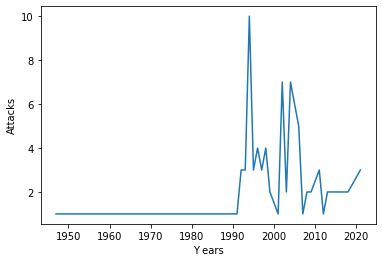

In [201]:
plt.plot([1947, 1980, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2011, 2012, 2013,
            2015, 2017, 2018, 2021], [1, 1, 1, 3, 3, 10, 3, 4, 3, 4, 2, 1, 7, 2, 7, 5, 1, 2, 2, 3, 1, 2, 2, 2, 2, 3])
plt.xlabel('Y ears')
plt.ylabel('Attacks')
plt.show()

In [148]:
df_pernambuco

,date,year,type,country,area,location,activity,sex_,age,injury,fatal_(y_n),species_,day_of_week,loc_check
3,2021-07-25,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Squatting in the water,M,32,Lacerations to poster thigh and buttock,N,NaN,Sunday,piedade
13,2021-07-10,2021,Unprovoked,BRAZIL,Pernambuco,Piedade,Wading,M,51,FATAL,Y,NaN,Saturday,piedade
65,2021-01-13,2021,Unprovoked,BRAZIL,Pernambuco,Cacimba do Padre Beach,Surfing,M,52,Puncture wounds to right hand,N,NaN,Wednesday,cacimba_do_padre
357,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,FATAL,Y,Tiger shark,Sunday,piedade
380,2018-04-15,2018,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,Sunday,piedade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,1992-09-10,1992,Unprovoked,BRAZIL,Pernambuco,"Boa Viagem, Recife",Swimming,M,NaN,FATAL,Y,NaN,Thursday,boa_viagem
2905,1992-06-28,1992,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,M,NaN,FATAL,Y,NaN,Sunday,piedade
2960,1991-04-24,1991,Provoked,BRAZIL,Pernambuco,"Praia de Pau Amarelo, Recife",Fishing,NaN,NaN,2 fingers severed by netted shark PROVOKED INC...,N,"170-kg, 2.8 m shark",Wednesday,pau_amarelo_paulista
3415,1980-11-11,1980,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,M,16,FATAL,Y,NaN,Tuesday,piedade


### Construção da análise Ataques vs Dia da Semana

In [149]:
df_dow = pd.DataFrame(df_pernambuco.day_of_week.sort_values(ascending=True).value_counts())

In [150]:
df_dow

,day_of_week
Sunday,22
Monday,14
Wednesday,10
Saturday,10
Tuesday,10
Friday,6
Thursday,5


In [151]:
df_dow['day'] = df_dow.index

In [152]:
df_dow.columns= [column.replace("day_of_week", 'times') for column in df_dow.columns]

In [153]:
df_dow

,times,day
Sunday,22,Sunday
Monday,14,Monday
Wednesday,10,Wednesday
Saturday,10,Saturday
Tuesday,10,Tuesday
Friday,6,Friday
Thursday,5,Thursday


### Criação do gráfico Ataques vs Dia da Semana

<AxesSubplot:>

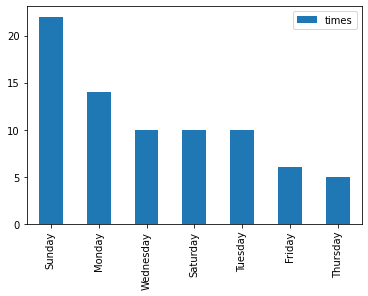

In [154]:
df_dow.plot(kind='bar')

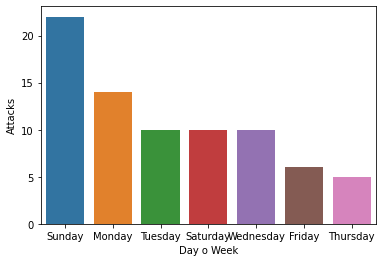

In [155]:
sns.barplot(['Sunday', 'Monday', 'Tuesday', 'Saturday', 'Wednesday', 'Friday',
       'Thursday'], [22, 14, 10, 10, 10, 6, 5])
plt.xlabel("Day o Week")
plt.ylabel("Attacks")

plt.show()

In [156]:
df_dow.index

Index(['Sunday', 'Monday', 'Wednesday', 'Saturday', 'Tuesday', 'Friday',
       'Thursday'],
      dtype='object')

In [157]:
list(df_dow.times)

[22, 14, 10, 10, 10, 6, 5]

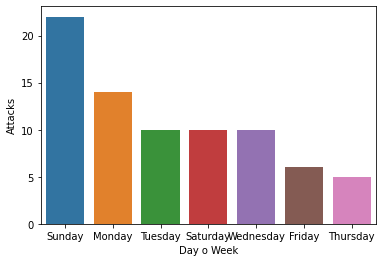

In [158]:
sns.barplot(['Sunday', 'Monday', 'Tuesday', 'Saturday', 'Wednesday', 'Friday',
       'Thursday'], [22, 14, 10, 10, 10, 6, 5])
plt.xlabel("Day o Week")
plt.ylabel("Attacks")

plt.show()

In [159]:
df_pernambuco.sex_.isnull().value_counts()

False    70
True      7
Name: sex_, dtype: int64

### Construção da análise Ataques vs Sexo

In [160]:
df_sex = pd.DataFrame(df_pernambuco.sex_.sort_values(ascending=True).value_counts())

In [161]:
df_sex

,sex_
M,67
F,3


In [162]:
df_sex['newc'] = df_sex.index

In [163]:
df_sex.columns= [column.replace("sex_", 'times') for column in df_sex.columns]

In [164]:
df_sex

,times,newc
M,67,M
F,3,F


### Criação do gráfico Ataques vs Sexo

([<matplotlib.patches.Wedge at 0x12007e7ee80>,
 [Text(-1.0097082618227442, 0.4364507142930266, ''),
  Text(0.8458456338817486, -0.7032390515629682, ''),
  Text(1.055442297353649, -0.30990572269135586, '')])

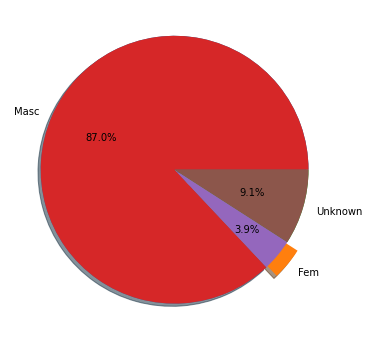

In [165]:
labels= 'Masc', 'Fem', 'Unknown'
sizes= [67, 3, 7]
explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)

ax1.axis('equal')

plt.pie(sizes)



In [166]:
df_pernambuco.columns= [column.replace("fatal_(y_n)", 'fatal') for column in df_pernambuco.columns]

In [167]:
df_pernambuco.fatal.isnull().value_counts()

False    73
True      4
Name: fatal, dtype: int64

In [168]:
df_fatal = pd.DataFrame(df_pernambuco.fatal.sort_values(ascending=True).value_counts())

In [169]:
df_fatal

,fatal
N,43
Y,30


In [170]:
df_fatal['yn'] = df_fatal.index

In [171]:
df_fatal

,fatal,yn
N,43,N
Y,30,Y


### Construção do gráfico Ataques Fatais

([<matplotlib.patches.Wedge at 0x1203a0287f0>,
 [Text(0.373878263188282, 1.0345119836499304, ''),
  Text(-0.536993821983836, -0.9600196014411333, ''),
  Text(1.0853837333075735, -0.17872367350553883, '')])

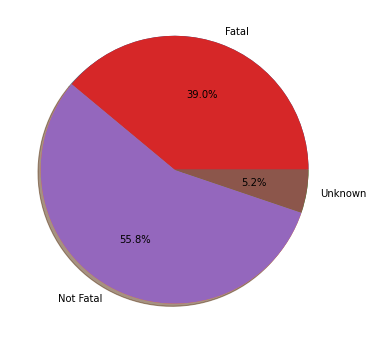

In [172]:
labels= 'Fatal', 'Not Fatal', 'Unknown'
sizes= [30, 43, 4]
explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)

ax1.axis('equal')

plt.pie(sizes)

### Análise dados em "activity"

### Análise dados nulos

In [173]:
df_pernambuco.activity.isnull().value_counts()

False    71
True      6
Name: activity, dtype: int64

In [174]:
df_activity = df_pernambuco.activity.sort_values().head(20)

### Tratamento de dados em "activity"

In [175]:
df_activity.astype('string')

2001                        Bathing
2043                  Body boarding
1829                  Body boarding
2890                  Body boarding
2867                  Body boarding
2960                        Fishing
533     Grabbing shark for a selfie
1664      Removing fish from a trap
681                    Scuba diving
3            Squatting in the water
2513                        Surfing
2138                        Surfing
2165                        Surfing
2601                        Surfing
2766                        Surfing
2765                        Surfing
2202                        Surfing
2517                        Surfing
2632                        Surfing
2221                        Surfing
Name: activity, dtype: string

In [176]:
df_activity.sort_values(ascending=True).drop_duplicates()

2001                        Bathing
2043                  Body boarding
2960                        Fishing
533     Grabbing shark for a selfie
1664      Removing fish from a trap
681                    Scuba diving
3            Squatting in the water
2513                        Surfing
Name: activity, dtype: object

In [177]:
df_activity = pd.DataFrame(df_pernambuco.activity.sort_values(ascending=True).value_counts())

In [178]:
df_activity

,activity
Surfing,31
Swimming,25
Body boarding,4
Swimming,2
Wading,2
Grabbing shark for a selfie,1
Squatting in the water,1
Scuba diving,1
Fishing,1
"Swimming, attempting to rescue a girl believed to be drowning",1


In [179]:
df_activity['doing'] = df_activity.index

In [180]:
df_activity

,activity,doing
Surfing,31,Surfing
Swimming,25,Swimming
Body boarding,4,Body boarding
Swimming,2,Swimming
Wading,2,Wading
Grabbing shark for a selfie,1,Grabbing shark for a selfie
Squatting in the water,1,Squatting in the water
Scuba diving,1,Scuba diving
Fishing,1,Fishing
"Swimming, attempting to rescue a girl believed to be drowning",1,"Swimming, attempting to rescue a girl believe..."


In [181]:
df_activity['doing'] = df_activity.doing.astype('string')

In [182]:
df_activity.doing = df_activity.doing.replace('Squatting in the water', 'Playin in the water')

In [183]:
df_activity

,activity,doing
Surfing,31,Surfing
Swimming,25,Swimming
Body boarding,4,Body boarding
Swimming,2,Swimming
Wading,2,Wading
Grabbing shark for a selfie,1,Grabbing shark for a selfie
Squatting in the water,1,Playin in the water
Scuba diving,1,Scuba diving
Fishing,1,Fishing
"Swimming, attempting to rescue a girl believed to be drowning",1,"Swimming, attempting to rescue a girl believe..."


### Criação gráfico Activity

([<matplotlib.patches.Wedge at 0x1203b394a00>,
 [Text(0.23808358650393224, 1.0739256053551498, ''),
  Text(-0.8726887161176866, -0.6696375174382512, ''),
  Text(0.8426488175527442, -0.7070664539326994, '')])

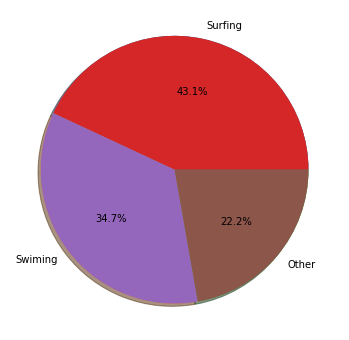

In [184]:
labels= 'Surfing', 'Swiming', 'Other'
sizes= [31, 25, 16]
explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)

ax1.axis('equal')

plt.pie(sizes)

In [185]:
#Não usado
list(df_activity.activity)

[31, 25, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1]

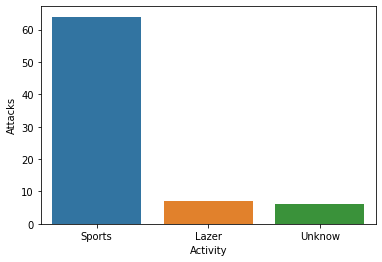

In [186]:
#Não usado
sns.barplot(['Sports', 'Lazer', 'Unknow'], [64, 7, 6])
plt.xlabel("Activity")
plt.ylabel("Attacks")

plt.show()

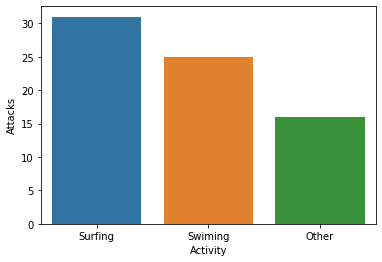

In [207]:
sns.barplot(['Surfing', 'Swiming', 'Other'], [31, 25, 21])
plt.xlabel("Activity")
plt.ylabel("Attacks")

plt.show()